In [1]:
import pandas as pd
import numpy as np

from scripts.utils import SimulateData

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

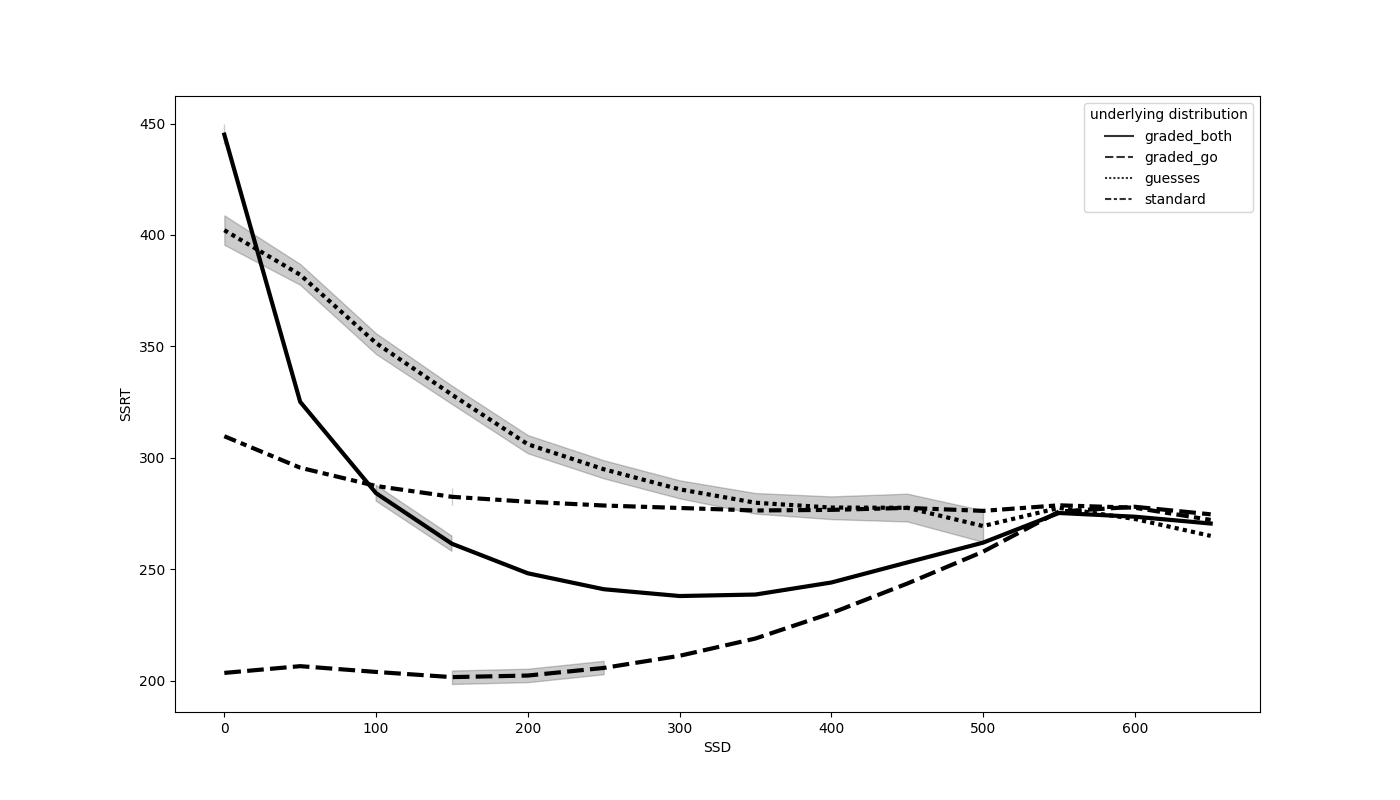

In [2]:
Image('figures/SSRT_by_SSD.png')

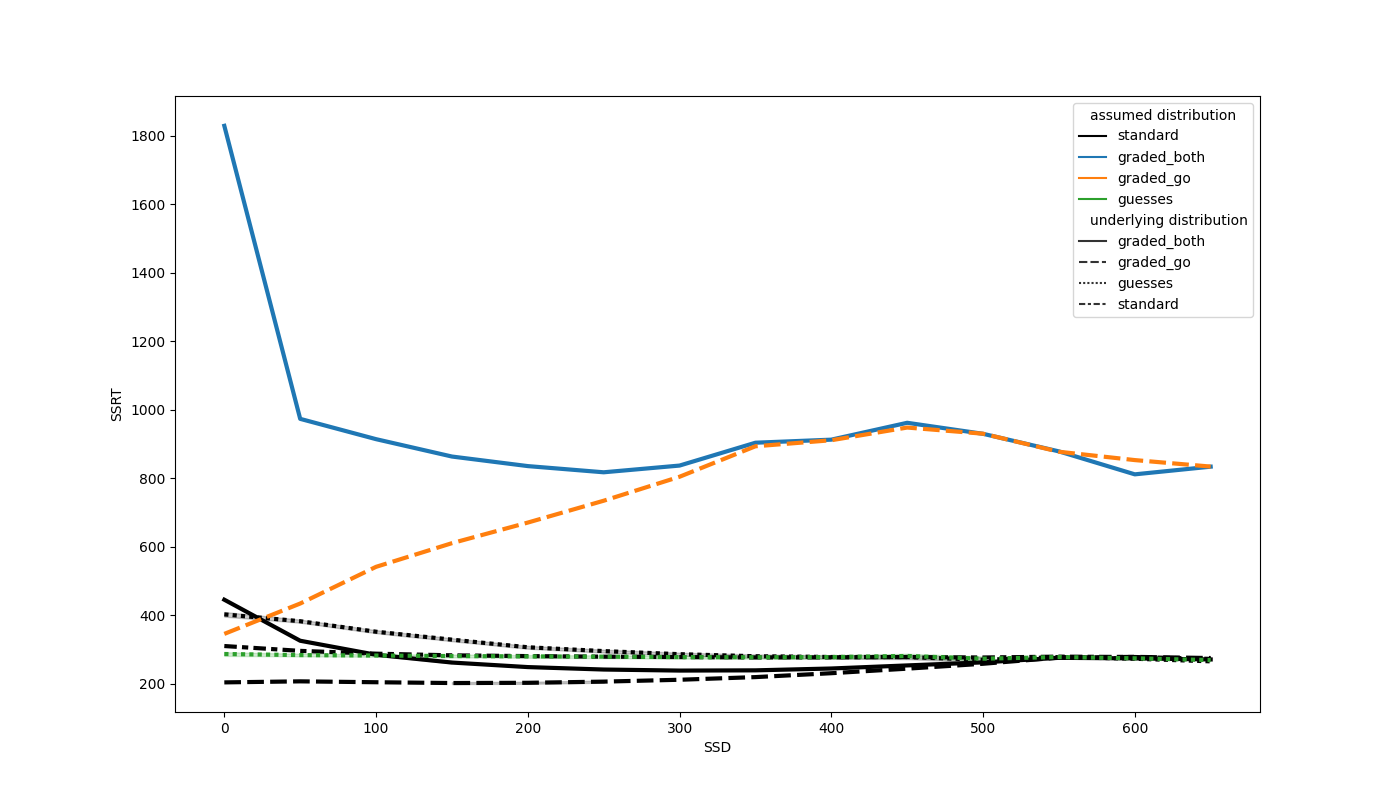

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

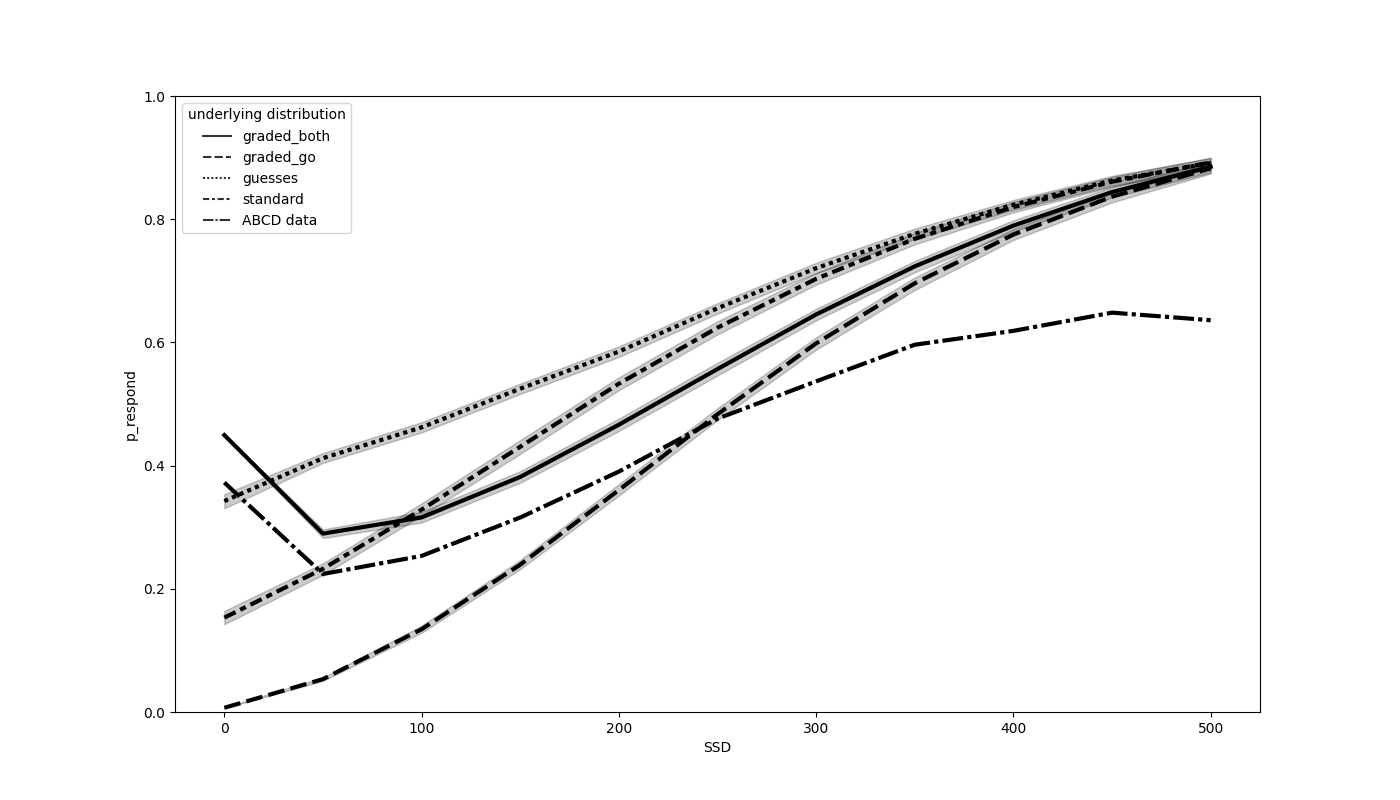

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [6]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,gen-guesses_SSRT-graded_go.2,gen-standard_SSRT-graded_go.3,gen-graded_both_SSRT-graded_both,gen-graded_go_SSRT-graded_both.1,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3
gen-graded_both_SSRT-standard,1.000000,0.741525,0.948086,0.852720,0.824348,0.232592,0.815950,0.519714,0.814067,0.605009,0.842645,0.754072,0.814067,0.605009,0.842645,0.754072
gen-graded_go_SSRT-standard.1,0.741525,1.000000,0.756192,0.904152,0.839986,0.770743,0.915349,0.805209,0.345102,0.607534,0.392226,0.521806,0.345102,0.607534,0.392226,0.521806
gen-guesses_SSRT-standard.2,0.948086,0.756192,1.000000,0.870642,0.755741,0.233299,0.844044,0.518968,0.687378,0.614985,0.791203,0.729146,0.687378,0.614985,0.791203,0.729146
gen-standard_SSRT-standard.3,0.852720,0.904152,0.870642,1.000000,0.928454,0.590972,0.984570,0.848008,0.500916,0.721368,0.553225,0.722292,0.500916,0.721368,0.553225,0.722292
gen-graded_both_SSRT-guesses,0.824348,0.839986,0.755741,0.928454,1.000000,0.633221,0.928538,0.864130,0.587152,0.656534,0.596599,0.720069,0.587152,0.656534,0.596599,0.720069
gen-graded_go_SSRT-guesses.1,0.232592,0.770743,0.233299,0.590972,0.633221,1.000000,0.648126,0.869618,-0.311928,0.279166,-0.313528,-0.013485,-0.311928,0.279166,-0.313528,-0.013485
gen-guesses_SSRT-guesses.2,0.815950,0.915349,0.844044,0.984570,0.928538,0.648126,1.000000,0.874065,0.440012,0.712144,0.537889,0.696183,0.440012,0.712144,0.537889,0.696183
gen-standard_SSRT-guesses.3,0.519714,0.805209,0.518968,0.848008,0.864130,0.869618,0.874065,1.000000,0.067798,0.556922,0.063745,0.428693,0.067798,0.556922,0.063745,0.428693
gen-graded_both_SSRT-graded_go,0.814067,0.345102,0.687378,0.500916,0.587152,-0.311928,0.440012,0.067798,1.000000,0.672314,0.957399,0.839072,1.000000,0.672314,0.957399,0.839072
gen-graded_go_SSRT-graded_go.1,0.605009,0.607534,0.614985,0.721368,0.656534,0.279166,0.712144,0.556922,0.672314,1.000000,0.639340,0.850083,0.672314,1.000000,0.639340,0.850083


In [7]:
df.filter(regex='SSRT-standard').corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3
gen-graded_both_SSRT-standard,1.000000,0.741525,0.948086,0.852720
gen-graded_go_SSRT-standard.1,0.741525,1.000000,0.756192,0.904152
gen-guesses_SSRT-standard.2,0.948086,0.756192,1.000000,0.870642
gen-standard_SSRT-standard.3,0.852720,0.904152,0.870642,1.000000


# Plot graded Mu Go function

In [14]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:285: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


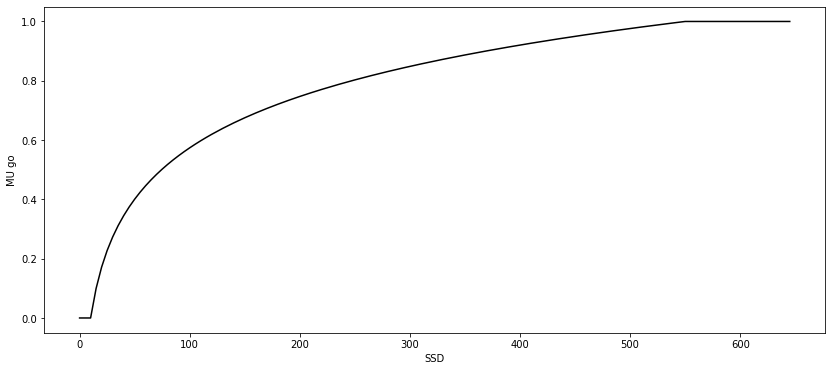

In [15]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')